# Activation Maximization in `CNNs`

Return to the [Castle](https://github.com/Nkluge-correa/TeenyTinyCastle)

According to "_[The mythos of model interpretability](https://arxiv.org/pdf/1606.03490.pdf)_", these are the properties of an "_interpretable model_": 

> A human can repeat (_"simulatability"_) the computation process with a full understanding of the algorithm (_"algorithmic transparency"_) and every individual part of the model owns an intuitive explanation (_"decomposability"_).

Explainable AI (`XAI`) is an approach to artificial intelligence that aims to achieve this level of interpretability. In it, we seek to create models that are transparent, interpretable, and can provide human-understandable explanations for their decisions or predictions.

The goal of `XAI` is to improve the trustworthiness and reliability of AI systems, as well as to facilitate collaboration between humans and machines. One could even say that `XAI` seeks to help us create a verifiable science of AI. `XAI` techniques include methods for visualizing model internals, feature importance analysis, and rule extraction, among other methods. 

By providing clear and interpretable explanations for the behavior of AI models, these techniques can help us increase the transparency and accountability of these systems, which is particularly important in applications such as healthcare, finance, and law enforcement, where decisions made by AI models can have significant impacts on people's lives. 

`XAI` (specifically in CV applications) has formed two major threads of response: `feature visualization` and `saliency mapping`. This notebook focuses on `feature visualization` techniques.

In this tutorial, we'll explore `Activation Maximization`. `Activation maximization` is a technique in machine learning used to understand and visualize the features a neural network learns. It involves optimizing an input image that maximizes the activation of a particular part of a neural network or its output. It can be a helpful tool for understanding and interpreting the behavior of `CNNs`. In simple terms, we are trying to answer:

> _What is a neuron looking for? How does this affect the output? Can we explore how the network decides that a "Cat" is a "Cat"_?

![image](https://christophm.github.io/interpretable-ml-book/images/cnn-features.png)

Source: _[A Guide for Making Black Box Models Explainable](https://christophm.github.io/interpretable-ml-book/)_.


> For a comprehensive explanation of the limitations and difficulties related to `Activation Maximization`, we recommend "_[Visualizing Higher-Layer Features of a Deep Network](https://www.researchgate.net/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network)_." For a complete guide on ML Explainability, we recommend "_[Interpretable Machine Learning: A Guide for Making Black Box Models Explainable](https://christophm.github.io/interpretable-ml-book/)_" (by _[Christoph Molnar](https://christophmolnar.com/)_).

In this notebook, we will analyze the activation maximization in some of `Imagenet's` images using the pre-trained `CNN`  (`MobileNetV2`) available through the `TensorFlow` library.

Let us get started by loading the pre-trained `CNN`.

In [3]:
import tensorflow as tf

model = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

print("TensorFlow version:", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

model.summary()

TensorFlow version: 2.12.0
Eager mode:  True
GPU is NOT AVAILABLE
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
             

Let us start by creating a random image (`MobileNetV2` works with images of size `224, 224, 3`). Then, we will create a loss function to perform gradient updates on our image:

> Instead of updating the parameters of our network concerning the loss function, we will update our image concerning how much a filter is activated.

In the following examples, we will create images that maximally activate the following classes in `MobileNetV2`: `Egyptian_cat`, `hair_spray`, `electric_guitar`, and `zebra`. 

> Here is a link with the identification of the 1000 classes that were used to train MobileNetV2 (the ImageNet database): _[IMAGENET 1000 Class List](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/)_.

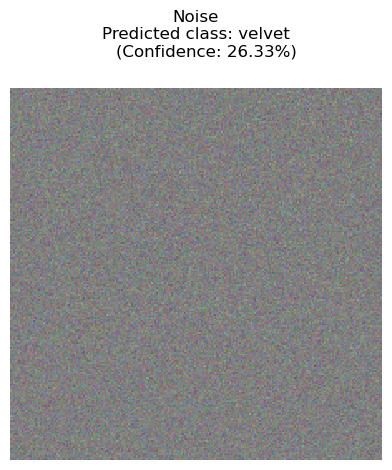

Optimizing for Egyptian Cat
Epoch 0: 1.0444684
Epoch 50: 0.17057762
Epoch 100: 0.0003139904
Epoch 150: 0.00010848522
Epoch 200: 6.775494e-05
Epoch 250: 4.669267e-05


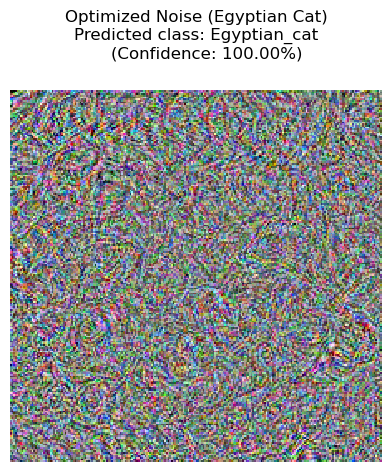

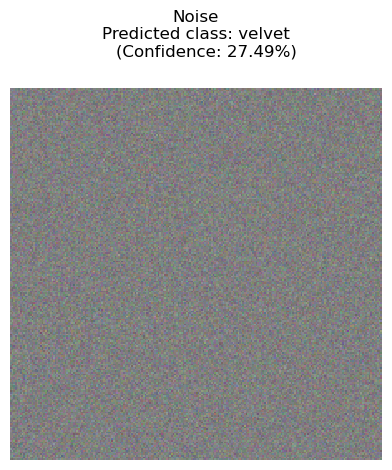

Optimizing for Hair Spray
Epoch 0: 1.0478162
Epoch 50: 0.000102365666
Epoch 100: 1.9798881e-05
Epoch 150: 1.2095902e-05
Epoch 200: 8.751482e-06
Epoch 250: 6.5880936e-06


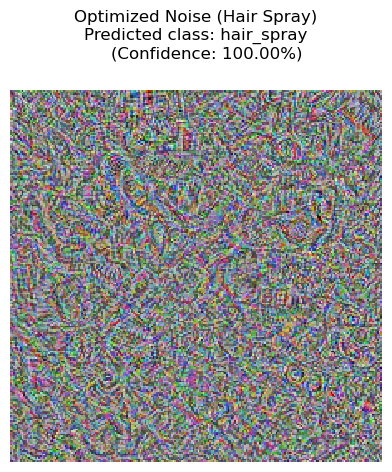

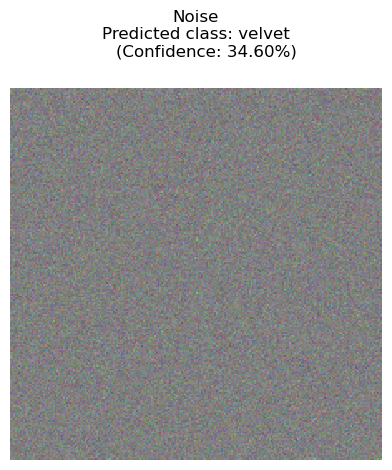

Optimizing for Electric Guitar
Epoch 0: 1.0667634
Epoch 50: 0.00016521152
Epoch 100: 3.2943943e-05
Epoch 150: 1.8925357e-05
Epoch 200: 1.3050934e-05
Epoch 250: 1.00707375e-05


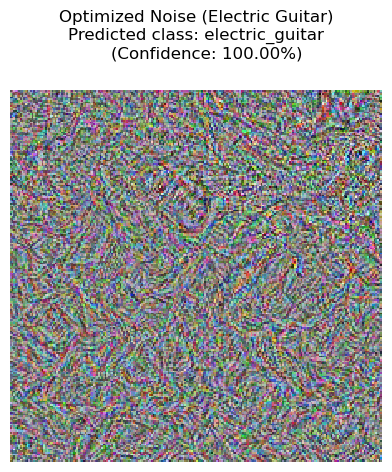

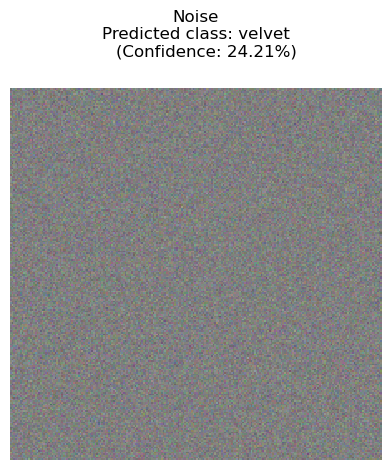

Optimizing for Zebra
Epoch 0: 1.0446357
Epoch 50: 0.006245529
Epoch 100: 3.607214e-05
Epoch 150: 1.4922783e-05
Epoch 200: 9.993607e-06
Epoch 250: 7.468195e-06


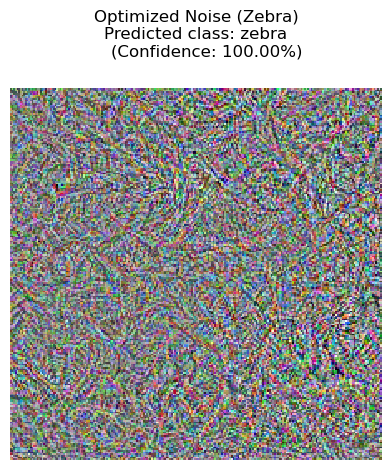

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.mobilenet import decode_predictions

# The dictionary of classes to optimize for
classes = {"Egyptian Cat" : 285,
            "Hair Spray": 585,
            "Electric Guitar": 546,
            "Zebra": 340}

images = list()

for i, image_class in enumerate(list(classes.values())):

    # The initial images are initialized with random values
    noise = tf.Variable(tf.random.normal((1,224,224,3), 0.0, 0.1))

    # Use the model to predict the most likely class for the noisy image
    preds = model.predict(tf.constant(noise),verbose=0)

    # clip the image to be between 0 and 1.0
    image_to_plot= np.clip((1.0+noise.numpy()[0,:,:,:])/2.0, 0, 1, 
                        out=(1.0+noise.numpy()[0,:,:,:])/2.0)
    
    # plot the noisy image
    plt.matshow(image_to_plot)
    plt.axis('off')
    plt.title(f'Noise\nPredicted class: {decode_predictions(preds)[0][0][1]}\n\
    (Confidence: {decode_predictions(preds)[0][0][2] * 100 :.2f}%)')
    plt.show()

    # the target image for the optimization 
    target_class = tf.one_hot(
        [image_class for _ in range(1)], 1000, 
        on_value=1.0, off_value=0.0,axis=None, 
        dtype=None, name=None) 
    
    # Use Adam as the optimizer
    opt = tf.optimizers.Adam(learning_rate=0.05)

    print(f"Optimizing for {list(classes.keys())[i]}")
    for step in range(300):
        with tf.GradientTape() as tape:
        # Loss calculates the L2 norm between the output of MobileNetV2 and the target class. 
            loss = tf.linalg.norm(model(noise) - target_class)
            grad = tape.gradient(loss, noise)
            opt.apply_gradients([(grad, noise)])
            # This clipping is done to ensure that the pixel values of the image remain 
            # within a valid range (-1.0, 1.0).
            noise.assign(tf.clip_by_value(noise, -1.0, 1.0)) 

            if step%50==0:
                print(f"Epoch {step}:", loss.numpy())

    preds = model.predict(tf.constant(noise),verbose=0)

    activation_maximazation = np.clip((1.0+noise.numpy()[0,:,:,:])/2.0, 0, 1, 
                       out=(1.0+noise.numpy()[0,:,:,:])/2.0)

    # add the optimized image to the list of images
    images.append(activation_maximazation)

    # plot the optimized image
    plt.matshow(activation_maximazation)
    plt.axis('off') 
    plt.title(f'Optimized Noise ({list(classes.keys())[i]})\nPredicted class: {decode_predictions(preds)[0][0][1]}\n\
    (Confidence: {decode_predictions(preds)[0][0][2] * 100 :.2f}%)')
    plt.show()


Let us now plot all of our maximally activated samples:

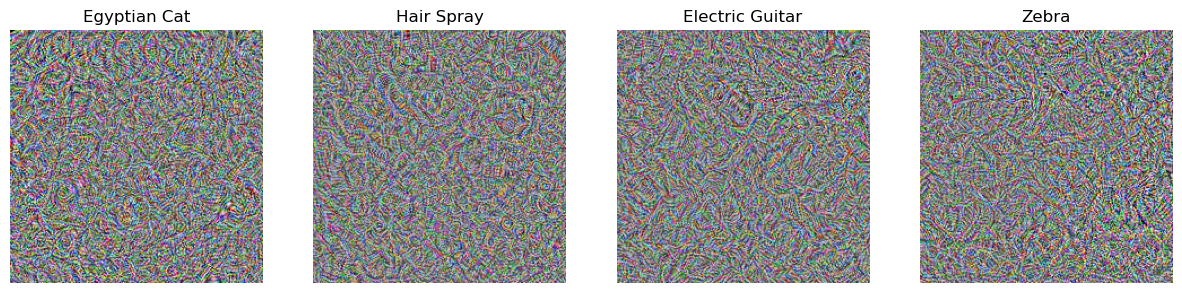

In [11]:
plt.figure(figsize=(15,15)) 

for i in range(4):
    plt.subplot(1,4,i+1)   
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(list(classes.keys())[i])

plt.show()

Now that we have created images that maximally activate all the target classes (`Egyptian Cat`, `Hair Spray`, `Electric guitar`, and `Zebra`), we can look for ways that would explain why "_a cat is a cat_" for a `CNN`, since these images represent what the `CNN` is looking for.

These images are similar to Rorschach paintings. The human eye will naturally search for patterns, like cat ears and zebra stripes, to match the known output class with the produced image. However, `CNNs` have a different representation of how visual data related to a given class can be "understood", which makes CNNs still hard to interpret.

For example, [Polysemantic Neurons](https://distill.pub/2020/circuits/zoom-in/#claim-1-polysemantic) respond to multiple unrelated inputs (like a cat's ear and the front of a car) and defy the notion that these systems compartmentalize representations in a human-native way.

Now, what would happen if we combined two maximally activated images?

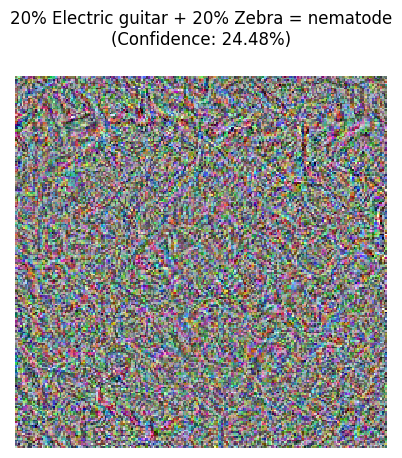

In [ ]:
combined_activation_maximazation = images[2] * 0.2 + images[3] * 0.2
x = tf.expand_dims(combined_activation_maximazation, axis=0)
preds = model.predict(tf.constant(x),verbose=0)

plt.matshow(images[0])
plt.axis('off') 
plt.title(f'20% Electric guitar + 20% Zebra = {decode_predictions(preds)[0][0][1]}\n\
(Confidence: {decode_predictions(preds)[0][0][2] * 100 :.2f}%)')
plt.show()

Given that these activation images can disrupt the classification of other fabricated images, what would they do to real images? Let us first see how `MobileNetV2` deals with an image of a cat (Xico 🐱).

Egyptian_cat (Confidence: 18.58%)
tabby (Confidence: 6.80%)
Siamese_cat (Confidence: 6.01%)
tiger_cat (Confidence: 3.28%)
lynx (Confidence: 2.28%)


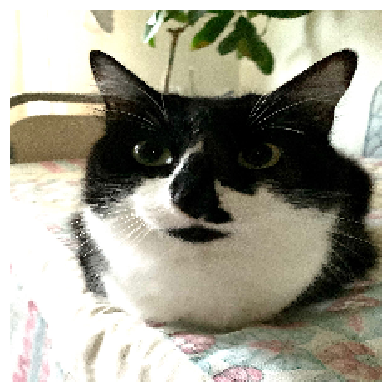

In [ ]:
img_path = r'samples/xico.jpg'

cat = tf.keras.utils.load_img(img_path, target_size=(224, 224))
cat = tf.keras.utils.img_to_array(cat)
cat = np.expand_dims(cat, axis=0)
cat /= 255.

preds = model.predict(tf.constant(cat),verbose=0)
top_5 = [f'{decode_predictions(preds)[0][i][1]} (Confidence: {decode_predictions(preds)[0][i][2] * 100 :.2f}%)' \
           for i in range(5)]

for output in top_5:
    print(output)

plt.matshow(cat[0])
plt.axis('off') 
plt.show()

We can see that most of the probability mass of our classifier is located in "cat-like" classes. However, if we add 40% of our artificially generated `Hair Spray` image, we can alter this probability distribution substantially.

jigsaw_puzzle (Confidence: 32.75%)
tabby (Confidence: 18.78%)
pillow (Confidence: 10.96%)
tiger_cat (Confidence: 6.29%)
miniature_schnauzer (Confidence: 3.46%)


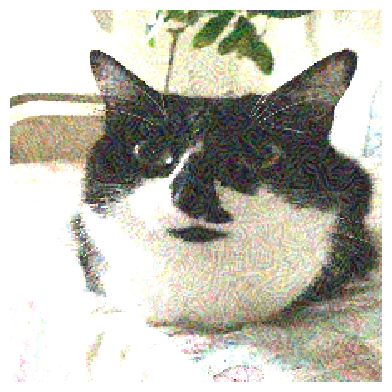

In [ ]:
perturbed_cat = cat[0] + images[1] * 0.4
perturbed_cat = np.expand_dims(perturbed_cat, axis=0)

preds = model.predict(tf.constant(perturbed_cat),verbose=0)
top_5 = [f'{decode_predictions(preds)[0][i][1]} (Confidence: {decode_predictions(preds)[0][i][2] * 100 :.2f}%)' \
           for i in range(5)]

for output in top_5:
    print(output)

perturbed_cat = np.clip(perturbed_cat, 0, 1, out=perturbed_cat)
plt.matshow(perturbed_cat[0])
plt.axis('off') 
plt.show()

Interpretability techniques like the one shown in this tutorial can help us better understand how `CNNs` perceive visual data, and also expose some of the vulnerabilities of computer vision algorithms trained via gradient-based learning methods.

This approach is the basic idea behind the creation of adversarial examples, ie.., perturbing inputs to hinder the classification of an ML model. For more information into [Adversarial ML](https://en.wikipedia.org/wiki/Adversarial_machine_learning), you can check [our repository](https://github.com/Nkluge-correa/TeenyTinyCastle/tree/master/ML-Adversarial).

---

Return to the [Castle](https://github.com/Nkluge-correa/TeenyTinyCastle)